In [2]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
# %pip install xlrd
# plt.rcParams.keys()

In [4]:
cab_data = pd.read_csv('Dataset/Cab_Data.csv')
city = pd.read_csv('Dataset/City.csv')
customer_id = pd.read_csv('Dataset/Customer_ID.csv')
transaction_id = pd.read_csv('Dataset/Transaction_ID.csv')

print(cab_data.shape,
city.shape,
customer_id.shape,
transaction_id.shape)

(359392, 7) (20, 3) (49171, 4) (440098, 3)


In [5]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Merge

`Cab_Data.csv` is a transaction data, so i will join it by `Cab_Data.csv`

I don't use the `City.csv`, because I think I don't need that

I will merge `Transaction_ID.csv` and `Customer_ID.csv`, and the result will be merged with `Cab_Data.csv`

In [9]:
df_temp = pd.merge(transaction_id, customer_id, on='Customer ID', how='left')
df_temp.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


In [10]:
df_used = pd.merge(cab_data, df_temp, on='Transaction ID', how='left')
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [11]:
df_used.shape

(359392, 12)

# Data Used

In [12]:
df_used.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242


# Check the Data Integrity and Cleaning the Data

In [13]:
df_used.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [14]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

It seems the `City.csv` need to be fixed, the population column should be int

In [15]:
city['Population'] = city['Population'].apply(lambda x: int(x.replace(',','')))
city['Users'] = city['Users'].apply(lambda x: int(x.replace(',','')))
city.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [16]:
df_used.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [17]:
city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

The data don't have the null value

In [18]:
df_used.duplicated().sum()

0

There are no duplicated data

Change the date in the `df_used` Date of Travel columns

In [19]:
df_used['Date of Travel'] = df_used['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [20]:
df_used.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
dtype: object

# Combine with US holidays dataset

In [21]:
us_holiday = pd.read_csv('Dataset/US Holiday Dates (2004-2021).csv')
us_holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [22]:
us_holiday.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [23]:
us_holiday['Date'] = pd.to_datetime(us_holiday['Date'])
us_holiday.dtypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object

In [24]:
df_used = pd.merge(df_used, us_holiday, left_on=['Date of Travel'], right_on=['Date'], how='left')
df_used.shape

(359854, 18)

In [25]:
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Holiday,WeekDay,Month,Day,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,NaT,NaN,NaN,NaN,NaN,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,NaT,NaN,NaN,NaN,NaN,NaN
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,NaT,NaN,NaN,NaN,NaN,NaN
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,NaT,NaN,NaN,NaN,NaN,NaN
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,NaT,NaN,NaN,NaN,NaN,NaN


In [26]:
df_used.drop(['Date', 'WeekDay', 'Month', 'Day', 'Year'], axis=1, inplace=True)
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,NaN
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,NaN
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,NaN
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,NaN


In [27]:
df_used['Holiday'].value_counts()

Holiday
Labor Day Weekend              3364
Christmas Eve                  2011
New Year’s Eve                 1786
Christmas Day                  1331
New Year's Day                 1260
Thanksgiving Day               1166
Eastern Easter                 1040
Veterans Day                   1012
Western Easter                  965
Thanksgiving Eve                863
Juneteenth                      747
Columbus Day                    673
Labor Day                       666
Valentine’s Day                 656
Memorial Day                    449
4th of July                     447
Washington's Birthday           345
Martin Luther King, Jr. Day     325
Name: count, dtype: int64

In [28]:
df_used.isna().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Holiday               340748
dtype: int64

In [29]:
df_used['Holiday'] = df_used['Holiday'].fillna('non Holiday')
df_used.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Holiday               0
dtype: int64

In [30]:
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday


The data seems good

# Feature Engineering

Make the `profit` columns.

Price Charged - Cost of Trip

In [31]:
df_used.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction ID,359854.0,10220689.89583,10000011.0,10110925.25,10220804.5,10330821.75,10440107.0,126739.982588
Date of Travel,359854,2017-08-16 21:50:23.726289152,2016-01-02 00:00:00,2016-11-24 00:00:00,2017-09-09 00:00:00,2018-05-11 00:00:00,2018-12-31 00:00:00,NaN
KM Travelled,359854.0,22.567304,1.9,12.0,22.44,32.96,48.0,12.232944
Price Charged,359854.0,423.517722,15.6,206.5,386.425,583.74,2048.03,274.455816
Cost of Trip,359854.0,286.196987,19.0,151.2,282.48,413.6832,691.2,157.989831
Customer ID,359854.0,19194.701346,1.0,2705.0,7459.0,36087.75,60000.0,21014.265474
Age,359854.0,35.336448,18.0,25.0,33.0,42.0,65.0,12.594056
Income (USD/Month),359854.0,15048.269943,2000.0,8419.0,14684.5,21034.0,35000.0,7969.495205


In [32]:
df_used['Profit'] = df_used['Price Charged'] - df_used['Cost of Trip']
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844


I want to make age group, but I want to see the distributions first

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


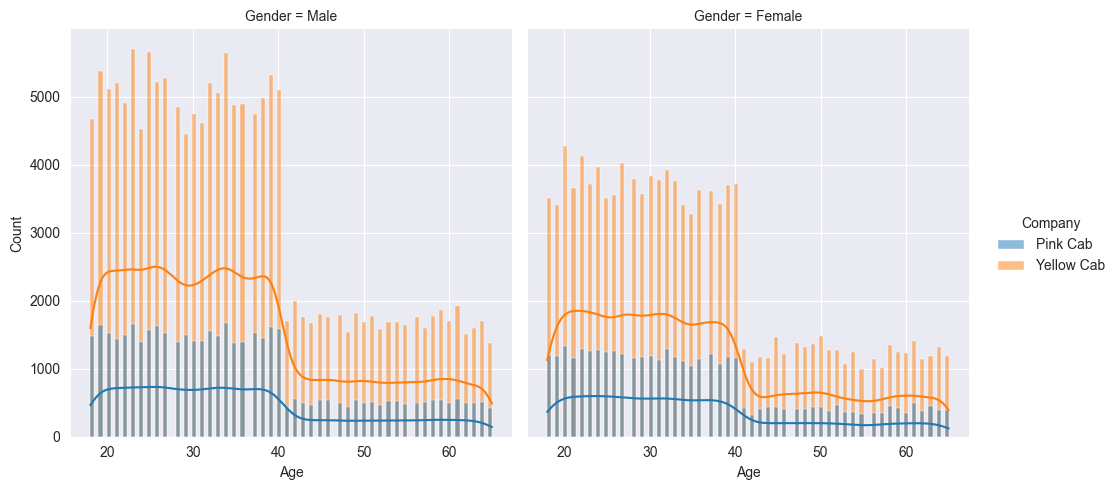

In [33]:
# plt.title('Distribution of  Age by Gender and Company')
sns.displot(df_used, x='Age', hue='Company', col='Gender', kde=True)
plt.show()

The majority customer of both company is under 40 years old for male and female. The minimum age is 18, and the maximum is 65

In [34]:
bins = [18, 24, 29, 34, 39, 44, 49, 54, 60, 100]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']

df_used['Age Group'] = pd.cut(df_used['Age'], bins=bins, labels=labels, right=False)
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit,Age Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315,25-29
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666,25-29
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568,50-54
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798,18-24
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844,30-34


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


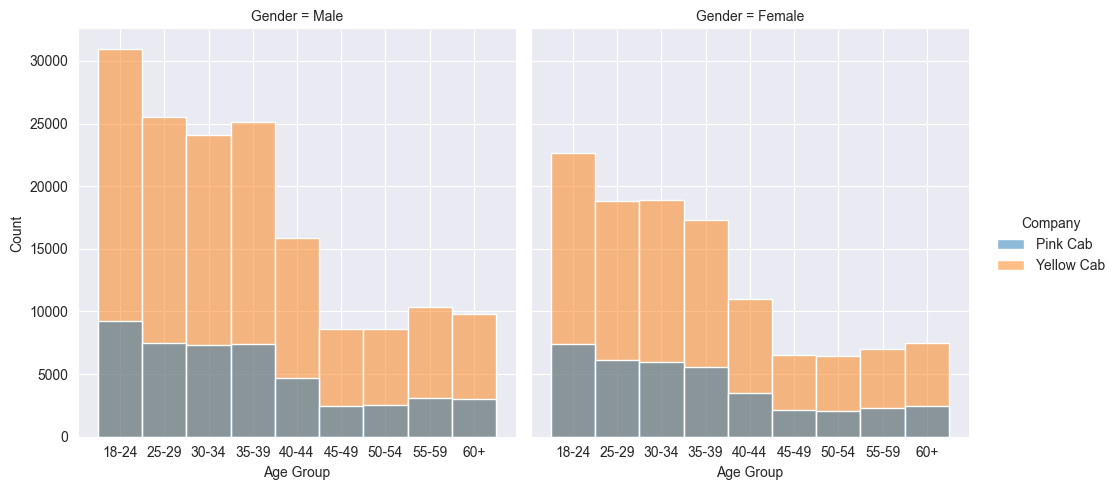

In [35]:
sns.displot(df_used, x='Age Group', hue='Company', col='Gender')
plt.show()

Make the month, year, and year-month columns

In [36]:
df_used['Month'] = pd.DatetimeIndex(df_used['Date of Travel']).month
df_used['Year'] = pd.DatetimeIndex(df_used['Date of Travel']).year
df_used['Year-Month'] = pd.to_datetime(df_used['Date of Travel']).dt.to_period('M')

df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit,Age Group,Month,Year,Year-Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315,25-29,1,2016,2016-01
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666,25-29,1,2016,2016-01
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568,50-54,1,2016,2016-01
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798,18-24,1,2016,2016-01
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844,30-34,1,2016,2016-01


# EDA and Statistical Analysis

In [37]:
df_used.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Holiday                       object
Profit                       float64
Age Group                   category
Month                          int32
Year                           int32
Year-Month                 period[M]
dtype: object

In [38]:
# num_cols = df_used.select_dtypes(include=['number'])
num_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Profit']
cat_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Holiday', 'Age Group']
df_used[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
KM Travelled,359854.0,22.567304,12.232944,1.90,12.0000,22.4400,32.9600,48.000
Price Charged,359854.0,423.517722,274.455816,15.60,206.5000,386.4250,583.7400,2048.030
Cost of Trip,359854.0,286.196987,157.989831,19.00,151.2000,282.4800,413.6832,691.200
Age,359854.0,35.336448,12.594056,18.00,25.0000,33.0000,42.0000,65.000
Income (USD/Month),359854.0,15048.269943,7969.495205,2000.00,8419.0000,14684.5000,21034.0000,35000.000
Profit,359854.0,137.320735,160.416242,-220.06,28.0165,81.9904,190.1294,1463.966


In [39]:
for i in cat_cols:
    print(f"Unique value of {df_used[i].value_counts()}, \n")



Unique value of Company
Yellow Cab    275069
Pink Cab       84785
Name: count, dtype: int64, 

Unique value of City
NEW YORK NY       100004
CHICAGO IL         56699
LOS ANGELES CA     48088
WASHINGTON DC      43811
BOSTON MA          29741
SAN DIEGO CA       20513
SILICON VALLEY      8528
SEATTLE WA          8004
ATLANTA GA          7569
DALLAS TX           7024
MIAMI FL            6461
AUSTIN TX           4899
ORANGE COUNTY       3986
DENVER CO           3831
NASHVILLE TN        3013
SACRAMENTO CA       2372
PHOENIX AZ          2065
TUCSON AZ           1933
PITTSBURGH PA       1313
Name: count, dtype: int64, 

Unique value of Payment_Mode
Card    215777
Cash    144077
Name: count, dtype: int64, 

Unique value of Gender
Male      206170
Female    153684
Name: count, dtype: int64, 

Unique value of Holiday
non Holiday                    340748
Labor Day Weekend                3364
Christmas Eve                    2011
New Year’s Eve                   1786
Christmas Day                 

## EDA for City.csv

In [40]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [41]:
city.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [42]:
city.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1231592.00,1.740127e+06,248968.0,608637.25,784559.0,1067041.0,8405837.0
Users,20.0,64520.65,8.349938e+04,3643.0,11633.25,23429.0,91766.0,302149.0


In [43]:
city.value_counts()

City              Population  Users 
ATLANTA GA        814885      24701     1
AUSTIN TX         698371      14978     1
TUCSON AZ         631442      5712      1
SILICON VALLEY    1177609     27247     1
SEATTLE WA        671238      25063     1
SAN FRANCISCO CA  629591      213609    1
SAN DIEGO CA      959307      69995     1
SACRAMENTO CA     545776      7044      1
PITTSBURGH PA     542085      3643      1
PHOENIX AZ        943999      6133      1
ORANGE COUNTY     1030185     12994     1
NEW YORK NY       8405837     302149    1
NASHVILLE TN      327225      9270      1
MIAMI FL          1339155     17675     1
LOS ANGELES CA    1595037     144132    1
DENVER CO         754233      12421     1
DALLAS TX         942908      22157     1
CHICAGO IL        1955130     164468    1
BOSTON MA         248968      80021     1
WASHINGTON DC     418859      127001    1
Name: count, dtype: int64

In [44]:
df_melted = pd.melt(city, id_vars=['City'], value_vars=['Population', 'Users'], 
                    var_name='Category', value_name='Values')

df_melted.head()

,City,Category,Values
0,NEW YORK NY,Population,8405837
1,CHICAGO IL,Population,1955130
2,LOS ANGELES CA,Population,1595037
3,MIAMI FL,Population,1339155
4,SILICON VALLEY,Population,1177609


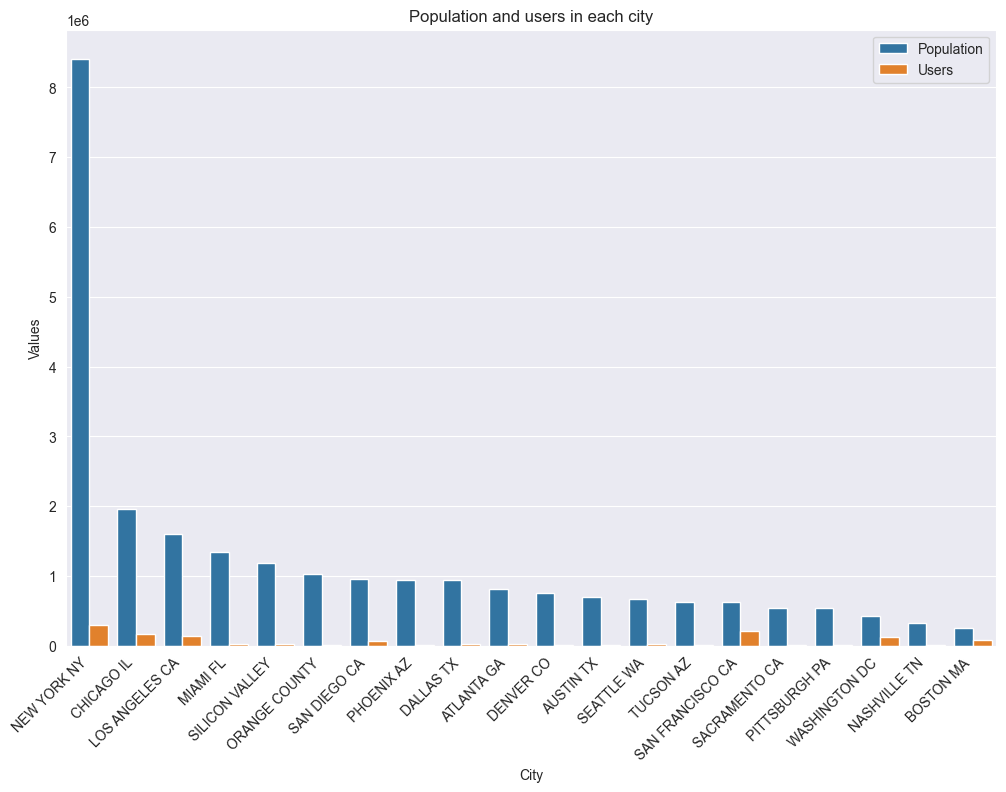

In [45]:
sns.barplot(data=df_melted, x='City', y='Values', hue='Category')
plt.title('Population and users in each city')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.show()

I want to see percentage of users based on population in each city (Conversion rate)

In [46]:
city['Users percentage'] = (city['Users'] / city['Population']) * 100
city.head().sort_values(by='Users percentage', ascending=False)

,City,Population,Users,Users percentage
2,LOS ANGELES CA,1595037,144132,9.036279
1,CHICAGO IL,1955130,164468,8.412126
0,NEW YORK NY,8405837,302149,3.594514
4,SILICON VALLEY,1177609,27247,2.313756
3,MIAMI FL,1339155,17675,1.319862


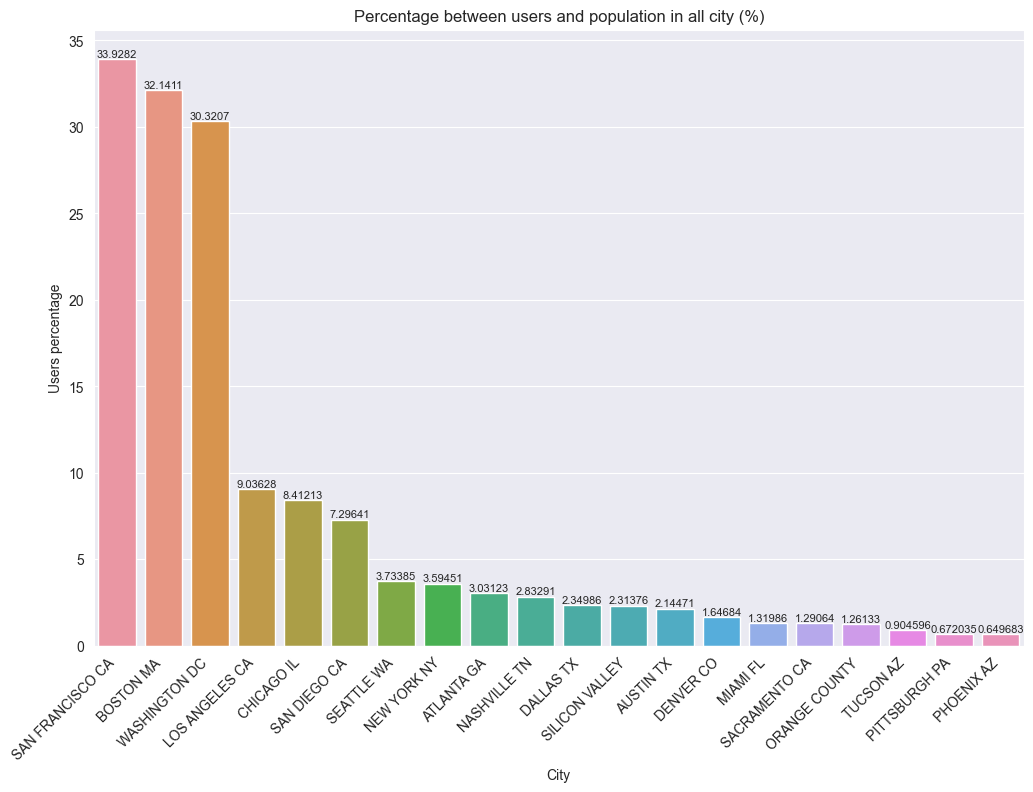

In [47]:
ax = sns.barplot(x='City', y='Users percentage', data=city.sort_values(by='Users percentage', ascending=False))
ax.bar_label(ax.containers[0], fontsize=8)

plt.title('Percentage between users and population in all city (%)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

More than 30% of population in San Francisco, Boston, and Washington DC is cab users

## EDA for Merged Data

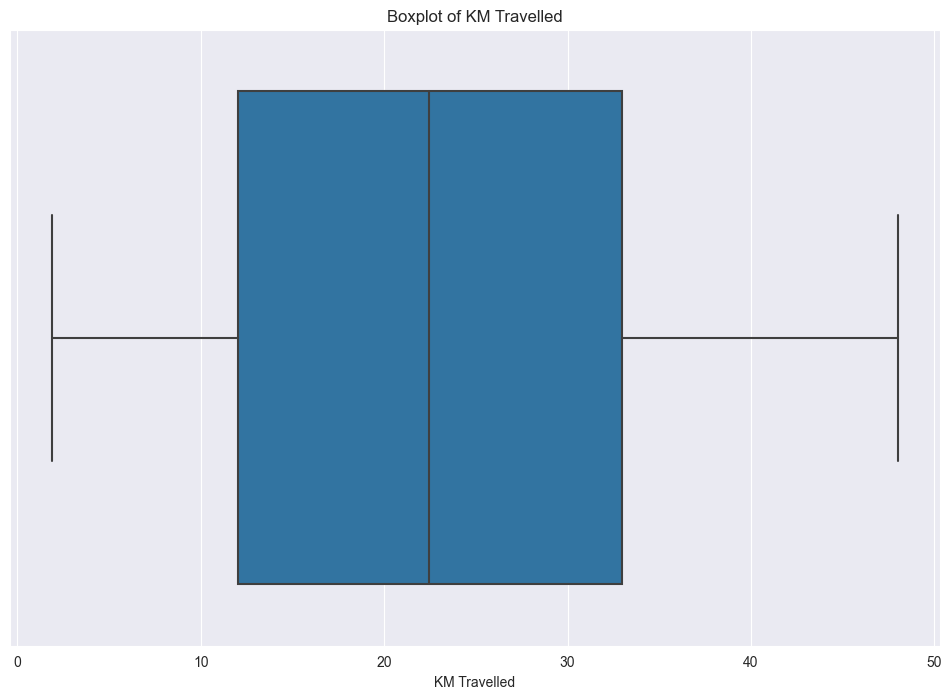

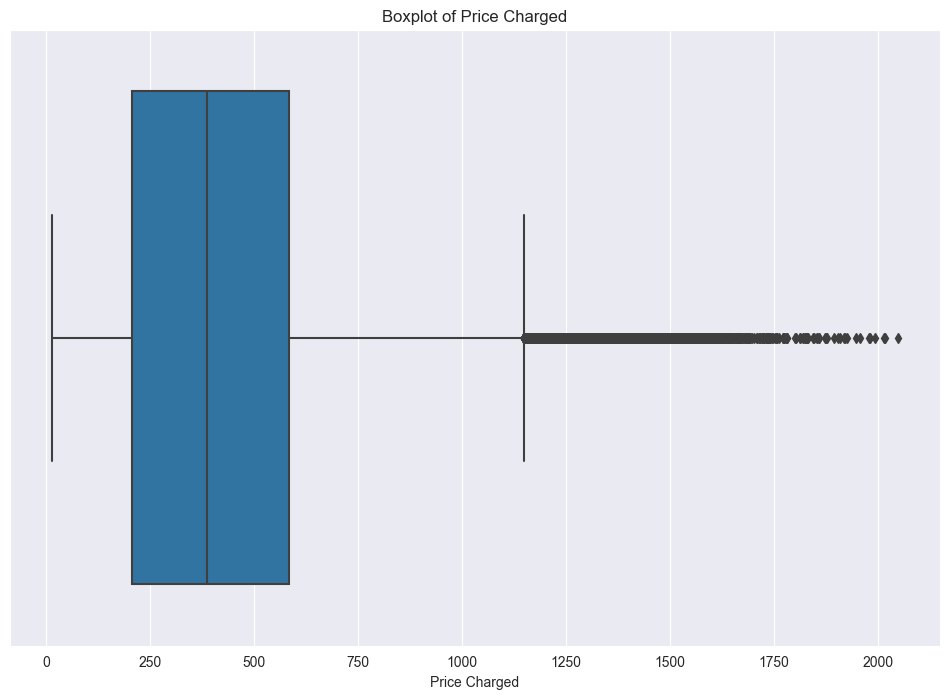

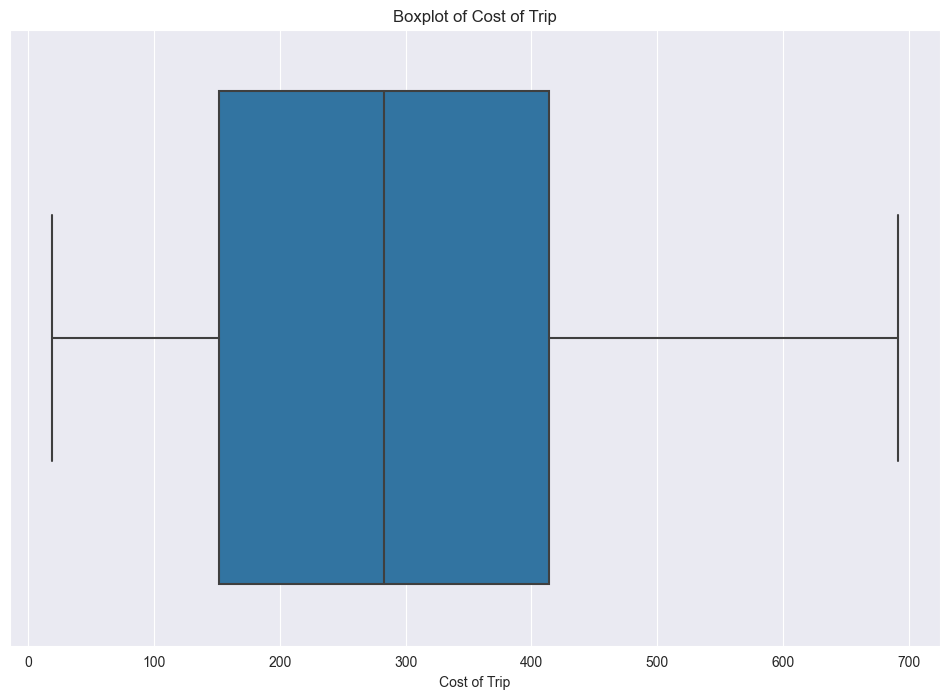

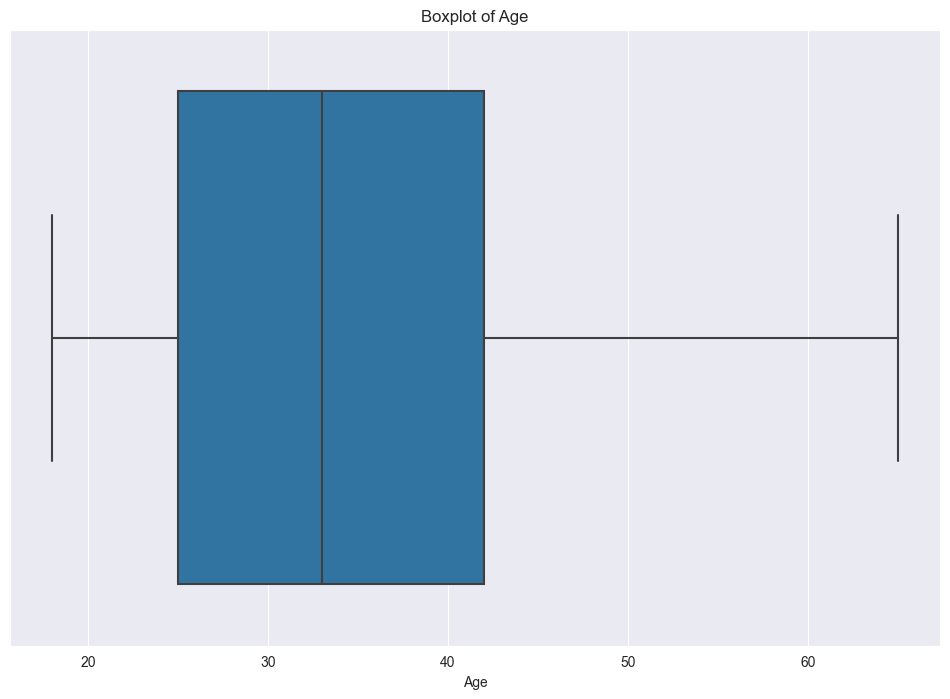

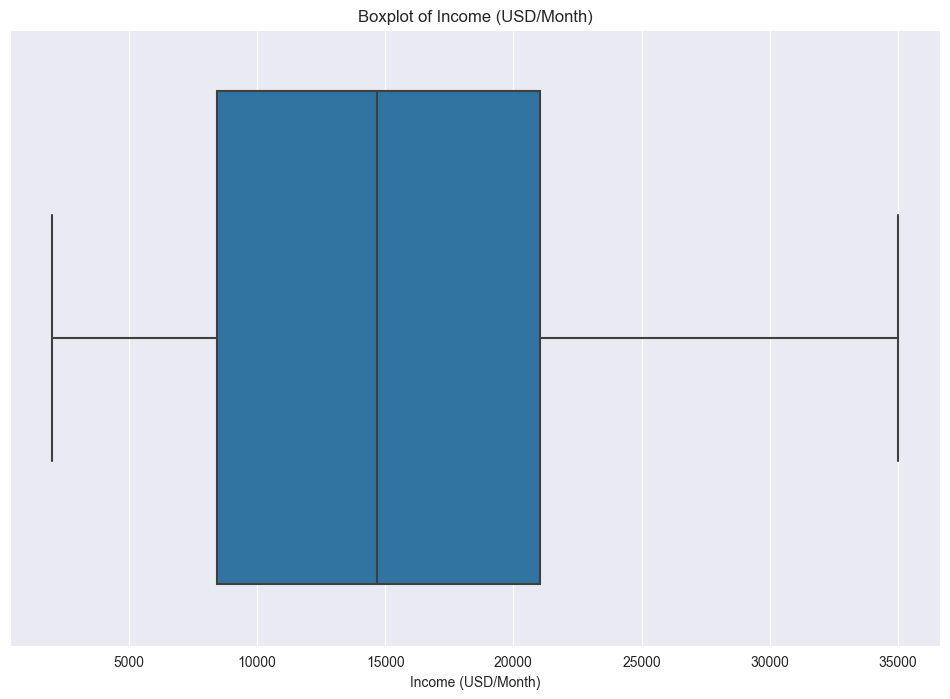

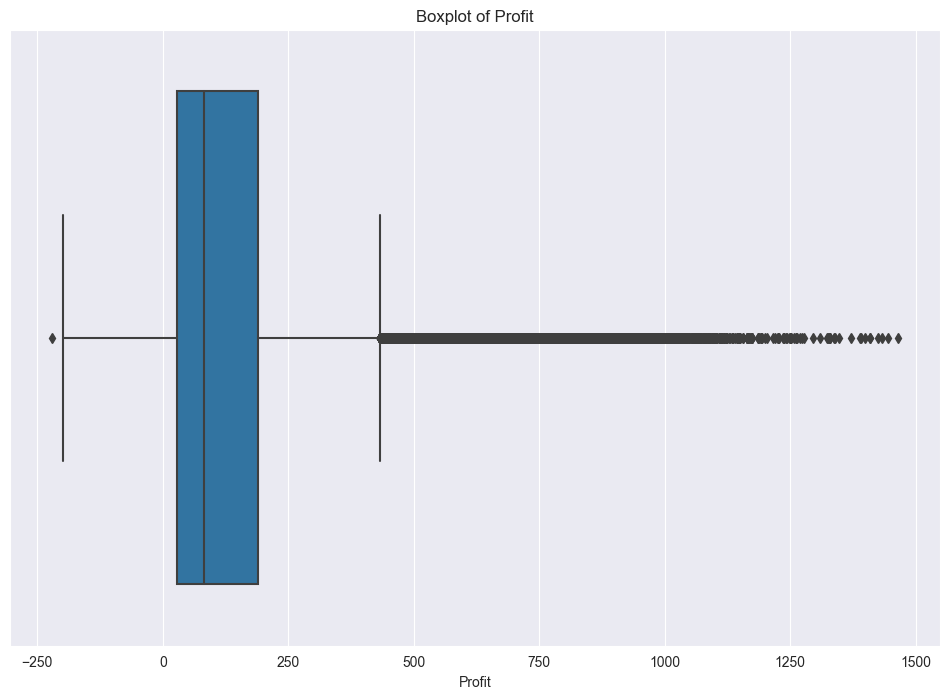

In [48]:
for i in num_cols:
    sns.boxplot(x=df_used[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [49]:
''' 

make profit column ✅
make age group ✅
check outlier
make user percentage column from City.csv
make visualization

'''

' \n\nmake profit column ✅\nmake age group ✅\ncheck outlier\nmake user percentage column from City.csv\nmake visualization\n\n'